In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df=pd.read_csv(clinical_trial_data_to_load)

mouse_drug_df.head()
clinical_trial_df.head()

print(mouse_drug_df.columns)
print(clinical_trial_df.columns)
# Combine the data into a single dataset
mouse_clinical_data_df =pd.DataFrame.merge(clinical_trial_df,mouse_drug_df,how='inner',on="Mouse ID")

# Display the data table for preview

mouse_clinical_data_df.head()
#mouse_clinical_data_df.sort([""])
#select the 4 drugs Capomulin, Infubinol, Ketapril, and Placebo
#list_drugs=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
#mouse_clinical_data_df=mouse_clinical_data_df[(mouse_clinical_data_df['Drug'] =='Capomulin')|
#                                             (mouse_clinical_data_df['Drug'] =='Infubinol')|
#                                              (mouse_clinical_data_df['Drug'] =='Ketapril')|
 #                                             (mouse_clinical_data_df['Drug'] =='Placebo')]
mouse_clinical_data_df.head()

Index(['Mouse ID', 'Drug'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupby_Drug_treat=mouse_clinical_data_df.groupby(["Drug","Timepoint"])
tum_mean=groupby_Drug_treat["Tumor Volume (mm3)"].mean()
#print(tum_mean.head())

# Convert to DataFrame
mean_tumor_respond=pd.DataFrame({"Tumor Volume (mm3)":tum_mean})
mean_tumor_respond=mean_tumor_respond.reset_index()
# Preview DataFrame
mean_tumor_respond.head(100)



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderror_tum_res =groupby_Drug_treat["Tumor Volume (mm3)"].sem()


# Convert to DataFrame
stderror_tum_res=pd.DataFrame({"Tumor Volume (mm3)":stderror_tum_res})

#this step is add a index column and also for each row add the drug name col
#Finally the df will have index, drug, sem and timepoin

stderror_tum_res=stderror_tum_res.reset_index()

# Preview DataFrame

stderror_tum_res.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames

mungled_mean_tumor_respond=mean_tumor_respond.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked

mungled_mean_tumor_respond.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Observation: 1.Capomulin is the most effective drug.
 2.Placebo has more or less same efect as other two Drug 


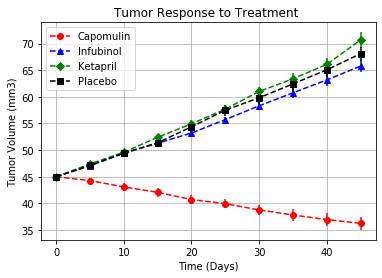

In [6]:
# Generate the Plot (with Error Bars)
Capomulin_err=stderror_tum_res.loc[stderror_tum_res["Drug"]=="Capomulin","Tumor Volume (mm3)"]
Infubinol_err=stderror_tum_res.loc[stderror_tum_res["Drug"]=="Infubinol","Tumor Volume (mm3)"]
Ketapril_err=stderror_tum_res.loc[stderror_tum_res["Drug"]=="Ketapril","Tumor Volume (mm3)"] 
Placebo_err=stderror_tum_res.loc[stderror_tum_res["Drug"]=="Placebo","Tumor Volume (mm3)"]

x_timepoint=stderror_tum_res.loc[stderror_tum_res["Drug"]=="Capomulin","Timepoint"]


#print(Capomulin_err)
#print(Capomulin_err.dtype)
#print(Capomulin_err.size)
#print(Capomulin_err.shape)
#print(x_timepoint)
#Plot
plt.errorbar(x_timepoint,mungled_mean_tumor_respond['Capomulin'],yerr=Capomulin_err,Label="Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(x_timepoint,mungled_mean_tumor_respond['Infubinol'],yerr=Infubinol_err,Label="Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(x_timepoint,mungled_mean_tumor_respond['Ketapril'],yerr=Ketapril_err,Label="Ketapril", marker= "D", color="green", linestyle='--')
plt.errorbar(x_timepoint,mungled_mean_tumor_respond['Placebo'],yerr=Placebo_err,Label="Placebo", marker= "s", color="black", linestyle='--')
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig("Tumor_Response.png")
print('Observation: 1.Capomulin is the most effective drug.\n 2.Placebo has more or less same efect as other two Drug ')

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_grp =mouse_clinical_data_df.groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
mean_metastatic_df=pd.DataFrame(mean_metastatic_grp)
#remove the Tumor volum columns as it is not needed
mean_metastatic_df =mean_metastatic_df.drop(['Tumor Volume (mm3)'],axis=1)

# Preview DataFrame
mean_metastatic_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Minor Data Munging to Re-Format the Data Frames #for mean

mean_metastatic_df =mean_metastatic_df.reset_index()

muged_mean_metastatic_df=mean_metastatic_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked

muged_mean_metastatic_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

std_met_grp=mouse_clinical_data_df.groupby(["Drug","Timepoint"])
std_met_grp.dtypes
sem_met =std_met_grp["Metastatic Sites"].sem()

# Convert to DataFrame
std_error_metastatic_df=pd.DataFrame(sem_met)

# Preview DataFrame
std_error_metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames #std error
std_error_metastatic_df=std_error_metastatic_df.reset_index()

# Preview that Reformatting worked

std_error_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


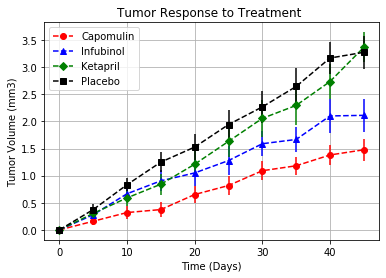

In [12]:
# Generate the Plot (with Error Bars)
Capomulin_err=std_error_metastatic_df.loc[std_error_metastatic_df["Drug"]=="Capomulin","Metastatic Sites"]
Infubinol_err=std_error_metastatic_df.loc[std_error_metastatic_df["Drug"]=="Infubinol","Metastatic Sites"]
Ketapril_err=std_error_metastatic_df.loc[std_error_metastatic_df["Drug"]=="Ketapril","Metastatic Sites"] 
Placebo_err=std_error_metastatic_df.loc[std_error_metastatic_df["Drug"]=="Placebo","Metastatic Sites"]

x_timepoint=stderror_tum_res.loc[stderror_tum_res["Drug"]=="Capomulin","Timepoint"]


#print(Capomulin_err)
#print(Capomulin_err.dtype)
#print(Capomulin_err.size)
#print(Capomulin_err.shape)
#print(x_timepoint)
#Plot
plt.errorbar(x_timepoint,muged_mean_metastatic_df['Capomulin'],yerr=Capomulin_err,Label="Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(x_timepoint,muged_mean_metastatic_df['Infubinol'],yerr=Infubinol_err,Label="Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(x_timepoint,muged_mean_metastatic_df['Ketapril'],yerr=Ketapril_err,Label="Ketapril", marker= "D", color="green", linestyle='--')
plt.errorbar(x_timepoint,muged_mean_metastatic_df['Placebo'],yerr=Placebo_err,Label="Placebo", marker= "s", color="black", linestyle='--')
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig('Metastatic.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Survive_rates_grp =mouse_clinical_data_df.groupby(['Drug','Timepoint'])
mouse_count=Survive_rates_grp.count()

# Convert to DataFrame
Survive_rates_df=pd.DataFrame(mouse_count)

Survive_rates_df=Survive_rates_df.reset_index().drop(['Tumor Volume (mm3)','Metastatic Sites'],axis=1)
Survive_rates_df=Survive_rates_df.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame

Survive_rates_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
Survive_rates_df =Survive_rates_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame

Survive_rates_df.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


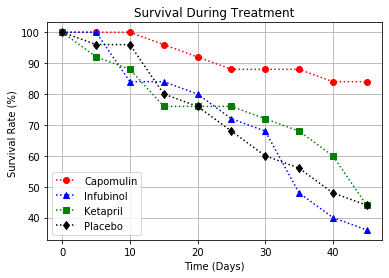

Observation" 1.Survival chances of the mice under the Capomulin drug is more as compared to other drugs including Plcebo


In [15]:
# Generate the Plot (Accounting for percentages)
x_timepoint=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


plt.plot(x_timepoint, (Survive_rates_df["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red", linestyle=':')
plt.plot(x_timepoint, (Survive_rates_df["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="blue", linestyle=':')
plt.plot(x_timepoint, (Survive_rates_df["Ketapril"]/25)*100 , label= "Ketapril", marker= "s", color="green", linestyle=':')
plt.plot(x_timepoint, (Survive_rates_df["Placebo"]/25)*100 , label= "Placebo", marker= "d", color="black", linestyle=':')
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()
# Save the Figure
plt.savefig("Survival_Rate.png")
# Show the Figure
plt.show()
print('Observation" 1.Survival chances of the mice under the Capomulin drug is more as compared to other drugs including Plcebo')

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
mungled_mean_tumor_respond

int_vol = 45
percent_vol_change = ((mungled_mean_tumor_respond.loc[45, :] - int_vol)/int_vol)*100
# Display the data to confirm
percent_vol_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

Observations: 1.Capomulin drug shows 19.475303% reduction in the tumor.


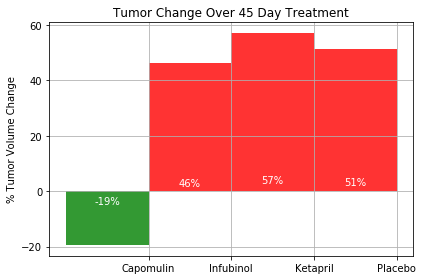

In [17]:
# Store all Relevant Percent Changes into a Tuple
tuple_percent_vol_change = tuple(zip(percent_vol_change.index, percent_vol_change))
tuple_percent_vol_change_list = list(tuple_percent_vol_change)
tuple_percent_vol_change_list
# Splice the data between passing and failing drugs
passing = []
failing = []
index_passing = []
index_failing = []
for i,elements in tuple_percent_vol_change_list :
    if elements > 0 :
        passing_drug = elements
        passing.append(elements)
        index_passing.append(i)
    else :
        failing_drugs = elements
        failing.append(elements)
        index_failing.append(i)
passing_drugs = list(zip(index_passing, passing))
failing_drugs = list(zip(index_failing, failing))

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
y_value1 = [percent_vol_change["Infubinol"], percent_vol_change["Ketapril"], percent_vol_change["Placebo"]]
x_axis1 = [0]
x_axis2 = [1, 2, 3]


bars1 = ax.bar(x_axis1, percent_vol_change["Capomulin"], color='g', alpha=0.8, align="edge", width = -1)
bars2 = ax.bar(x_axis2, y_value1 , color='r', alpha=0.8, align="edge", width = -1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
        yticks=[-20, 0, 20, 40, 60])

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha='center', va='top', color="white")
# Call functions to implement the function calls
autolabel(bars1)
autolabel(bars2)
fig.tight_layout()
# Save the Figure
plt.savefig("Percentage_Tumor_Volume_Change.png")
# Show the Figure
fig.show()
print("Observations: 1.Capomulin drug shows 19.475303% reduction in the tumor.")

![Metastatic Spread During Treatment](../Images/change.png)